# Amazon Stock Forecasting with ML Models

# Install Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb



In [ ]:
df =pd.read_csv("/content/AMZN.csv")

In [ ]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000
1,1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000
2,2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000
3,3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000
4,4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000


In [ ]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
6830,6830,2024-07-09,199.399994,200.570007,199.050003,199.339996,32700100
6831,6831,2024-07-10,200.000000,200.110001,197.690002,199.789993,32883800
6832,6832,2024-07-11,200.089996,200.270004,192.860001,195.050003,44565000
6833,6833,2024-07-12,194.800003,196.470001,193.830002,194.490005,30554000
6834,6834,2024-07-15,194.542496,196.190002,190.830002,192.720001,38808123


# EDA

In [ ]:
# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)

In [ ]:
start_date = '2023-07-01'
end_date = '2024-07-15'
df = df[(df.index >= start_date) & (df.index <= end_date)][['Close']]

In [ ]:
df= df[["Close"]]

In [ ]:
df.head()

,Close
Date,
2023-07-03,130.220001
2023-07-05,130.380005
2023-07-06,128.360001
2023-07-07,129.779999
2023-07-10,127.129997


In [ ]:
data =df.copy()

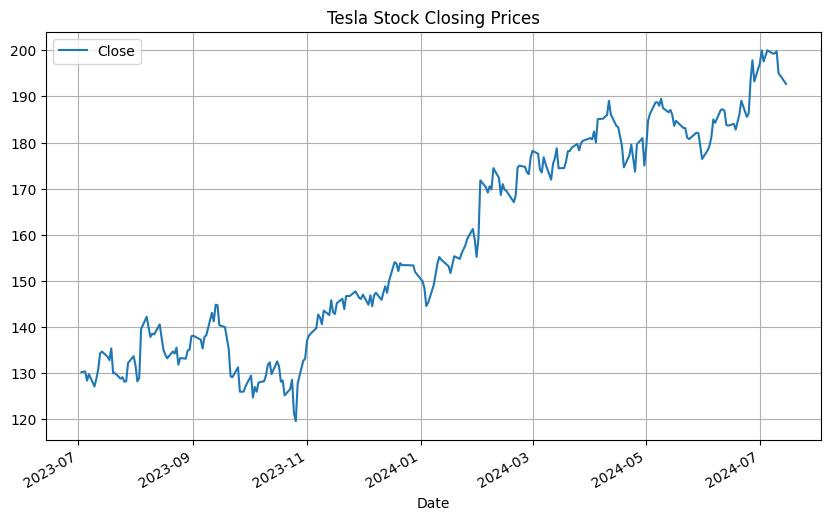

In [ ]:
# Plot the data
data.plot(figsize=(10, 6))
plt.title('Tesla Stock Closing Prices')
plt.grid(True)
plt.show()

# Train Test split

In [ ]:
# Train-test split (80% training, 20% testing)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Data Scaling

In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
# Prepare the data for forecasting
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
# Set the time step
time_step = 5
X_train, y_train = create_dataset(scaled_train_data, time_step)
X_test, y_test = create_dataset(scaled_test_data, time_step)


In [ ]:
# Reshape for machine learning models
X_train = X_train.reshape(-1, time_step)
X_test = X_test.reshape(-1, time_step)

# Linear Regression

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.00
R-squared: 0.87


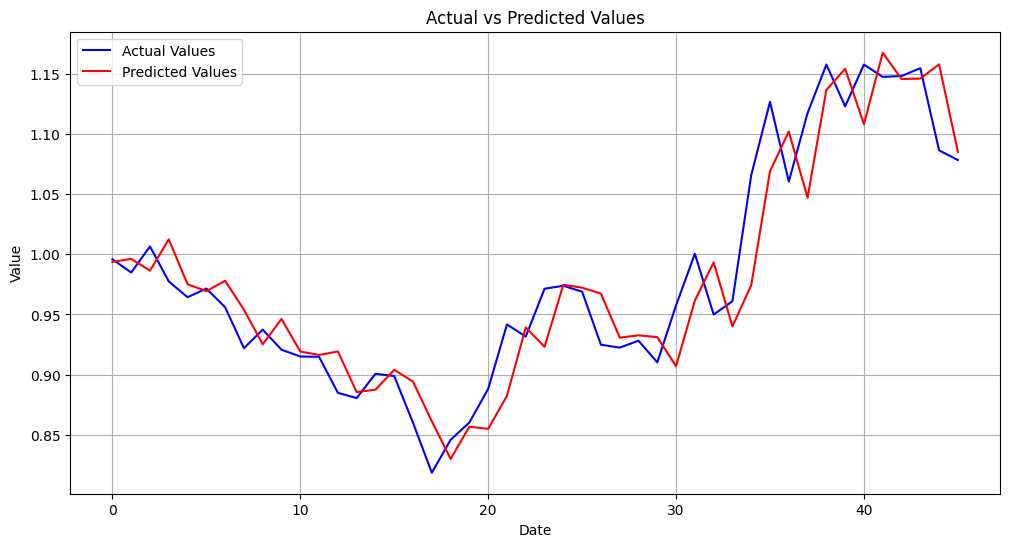

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
 #Inverse scaling the predictions
lr_predictions = scaler.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
# Forecast next 30 days using the Linear Regression model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Next 30 Days Forecasting

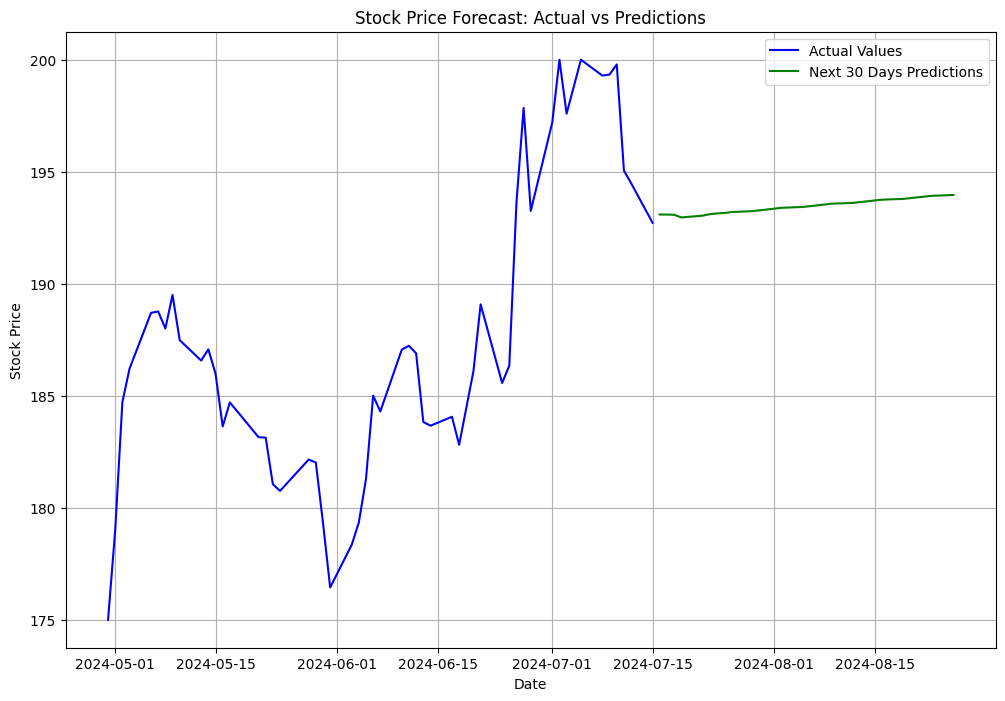

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

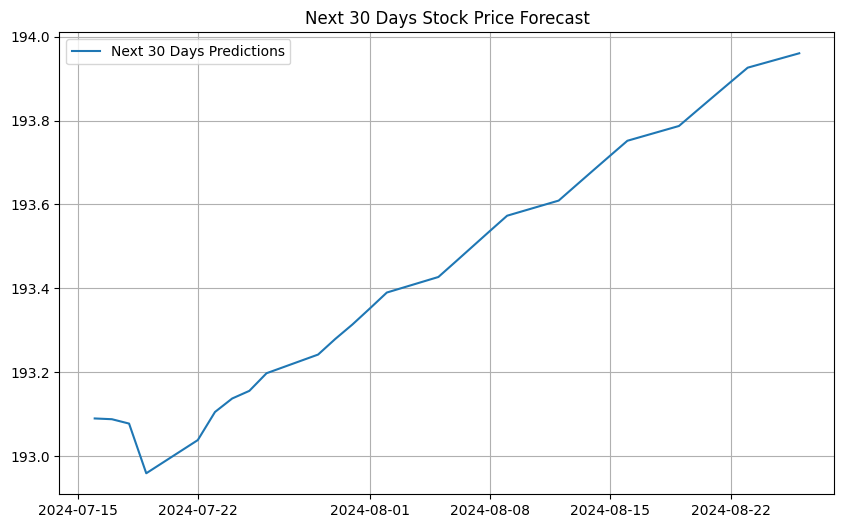

In [ ]:
# Plot future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions')
plt.title('Next 30 Days Stock Price Forecast')
plt.grid()
plt.legend()
plt.show()

# Next 90 Days Forecasting

In [ ]:
# Forecast next 90 days using the Linear Regression model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

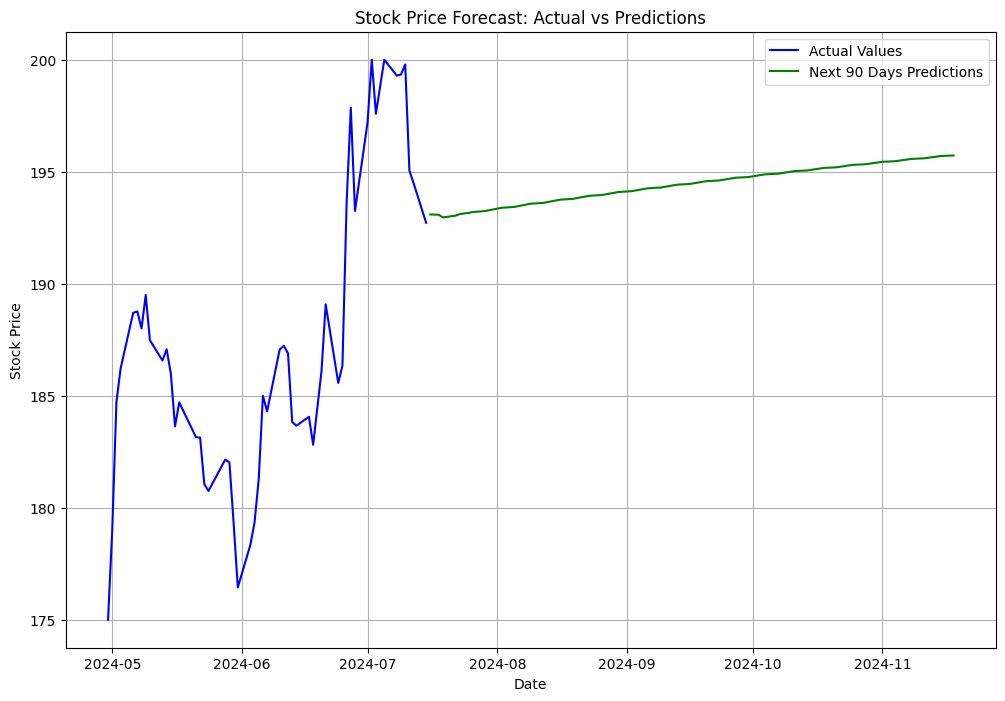

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

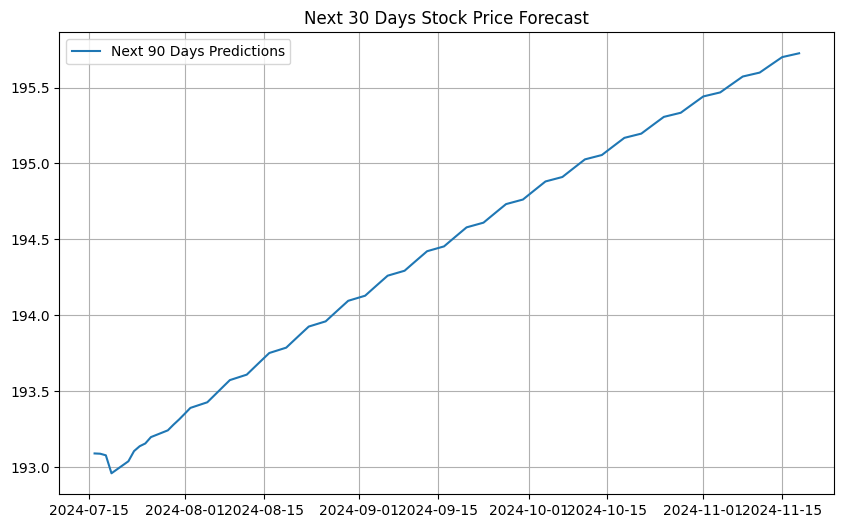

In [ ]:
# Plot future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions')
plt.title('Next 30 Days Stock Price Forecast')
plt.grid()
plt.legend()
plt.show()

# Random Forest Regressor

In [ ]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.01
R-squared: -0.26


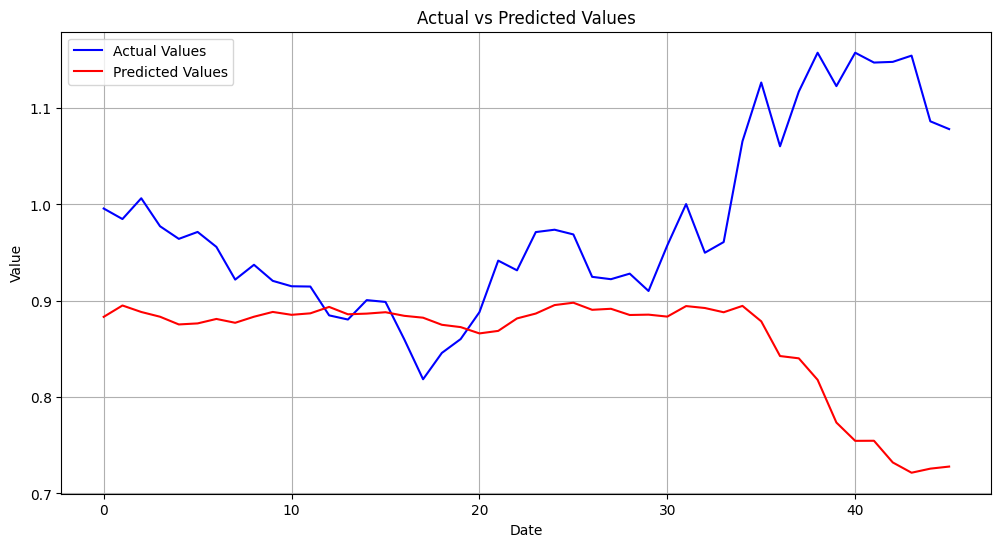

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Next 30 Days Forecasting with Random Forest Regressor

In [ ]:

# Forecast next 30 days using the Random Forest  Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = rf_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

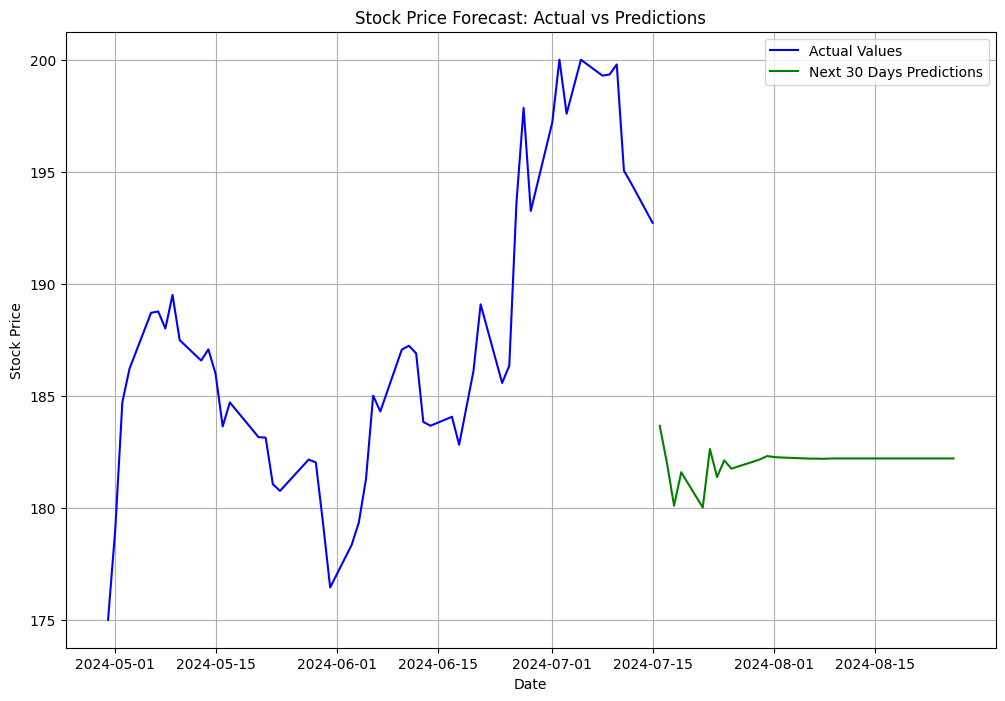

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

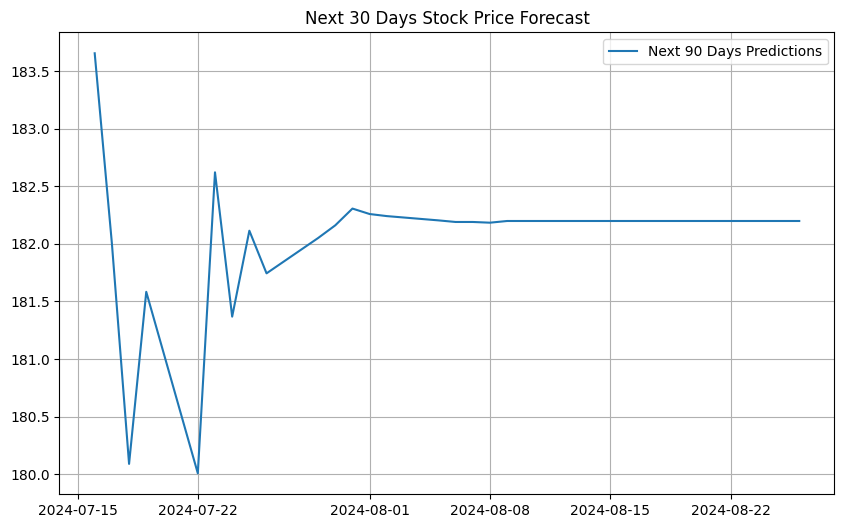

In [ ]:
# Plot future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions')
plt.title('Next 30 Days Stock Price Forecast')
plt.grid()
plt.legend()
plt.show()

# Next 90 Days Forecasting with Random Forest Regressor

In [ ]:
# Forecast next 30 days using the Random Forest Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = rf_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

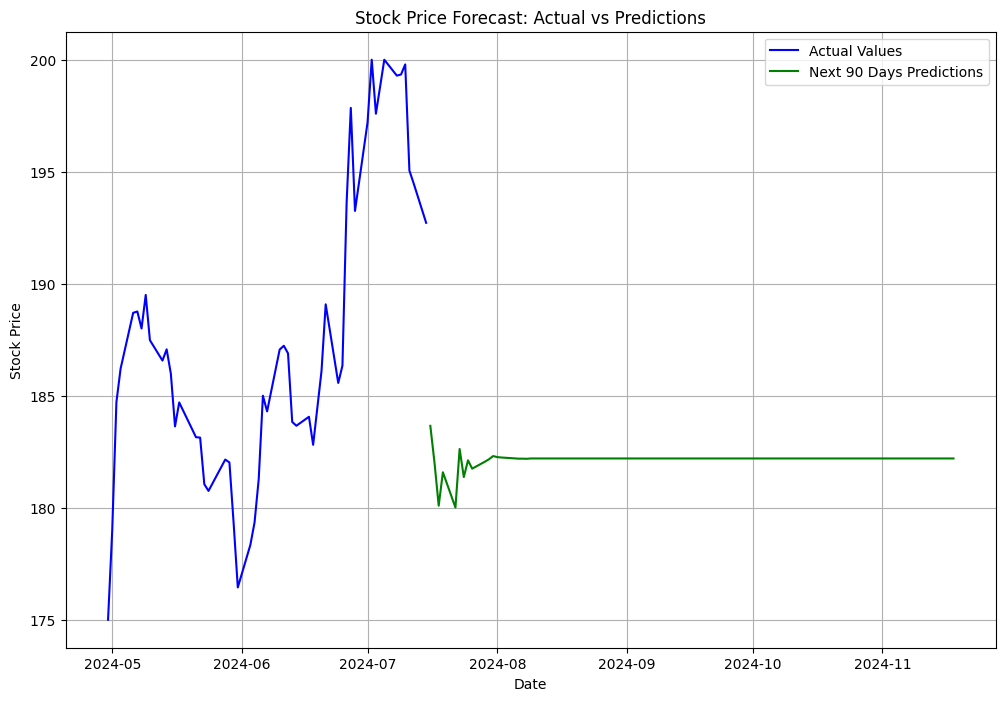

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

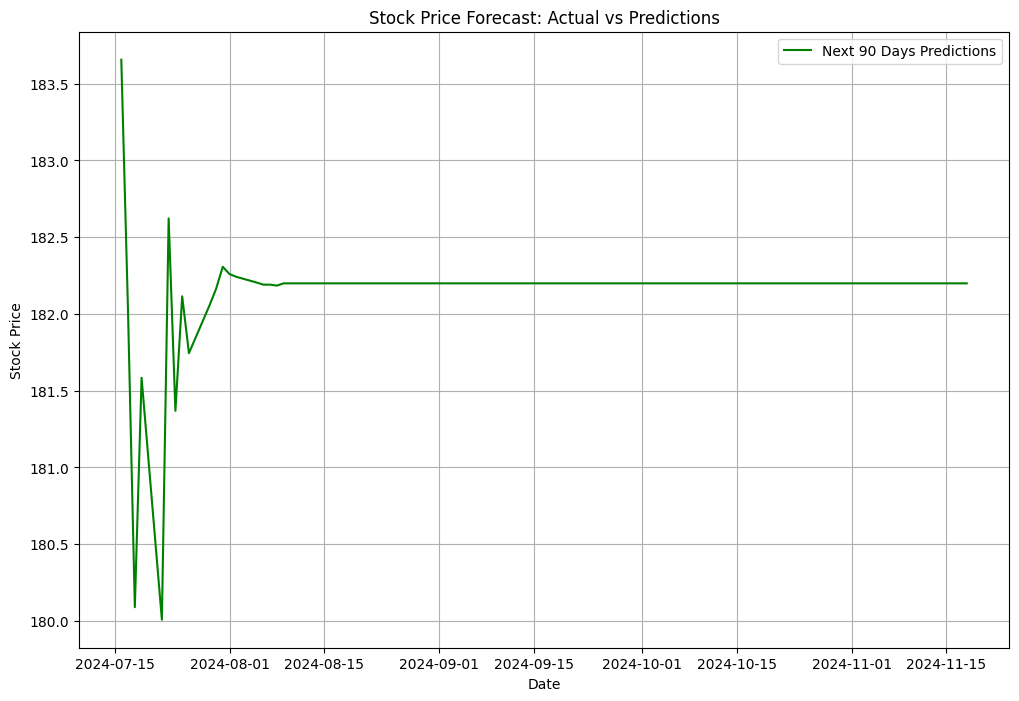

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# Support Vector Regressor

In [ ]:
# 3. Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.03
R-squared: -2.82


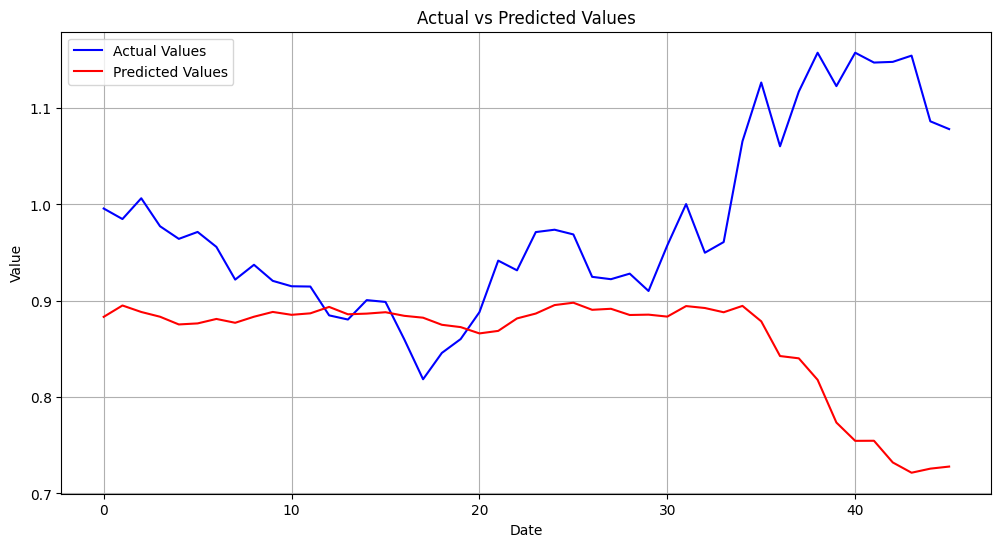

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Next 30 Days Forecasting with Support Vector Regressor

In [ ]:
# Forecast next 30 days using the Support Vector  Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = svr_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

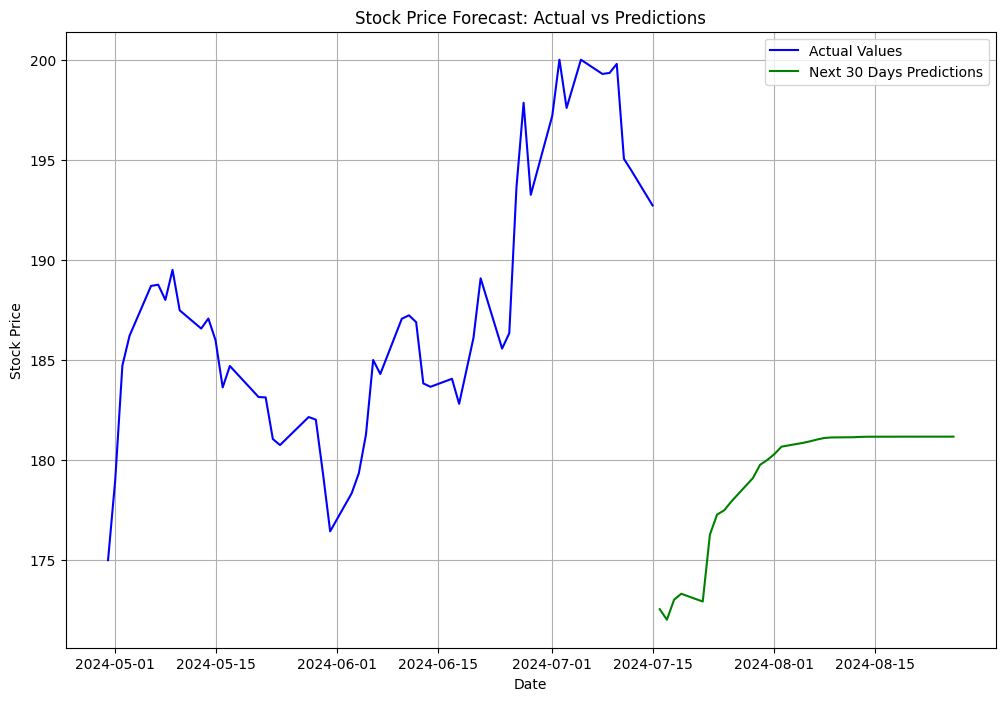

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# Next 90 Days Forecasting with Support Vector Regressor

In [ ]:
# Forecast next 30 days using the Support Vector Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = svr_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

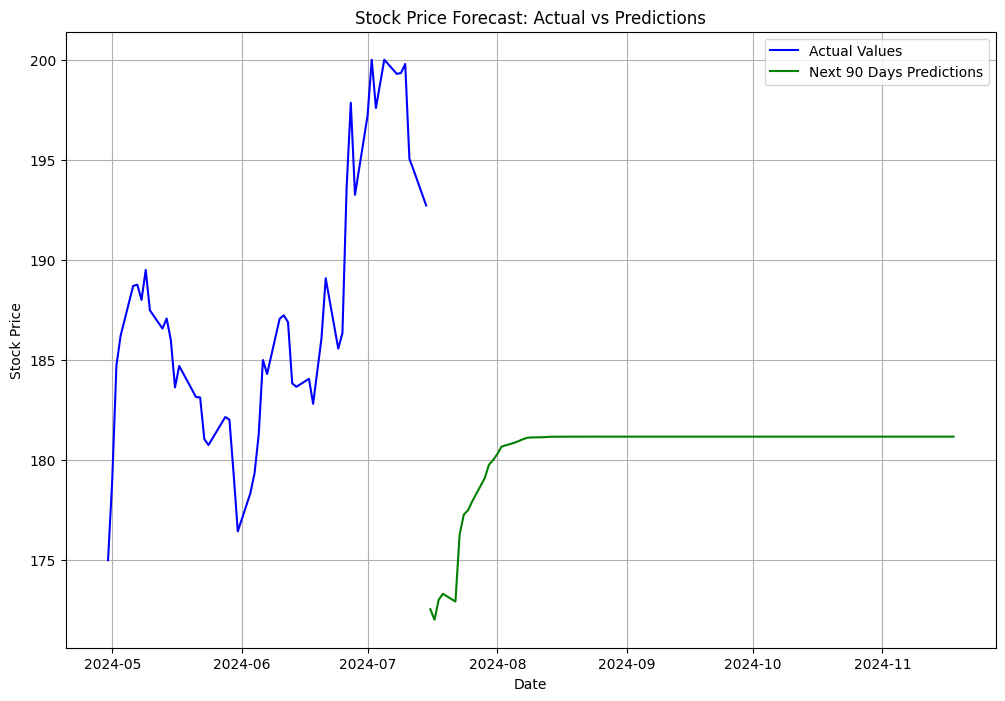

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# XGB Regressor

In [ ]:
# Initialize XGBRegressor
Xgb_model = xgb.XGBRegressor()

# Train the model
Xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = Xgb_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.01
R-squared: -0.58


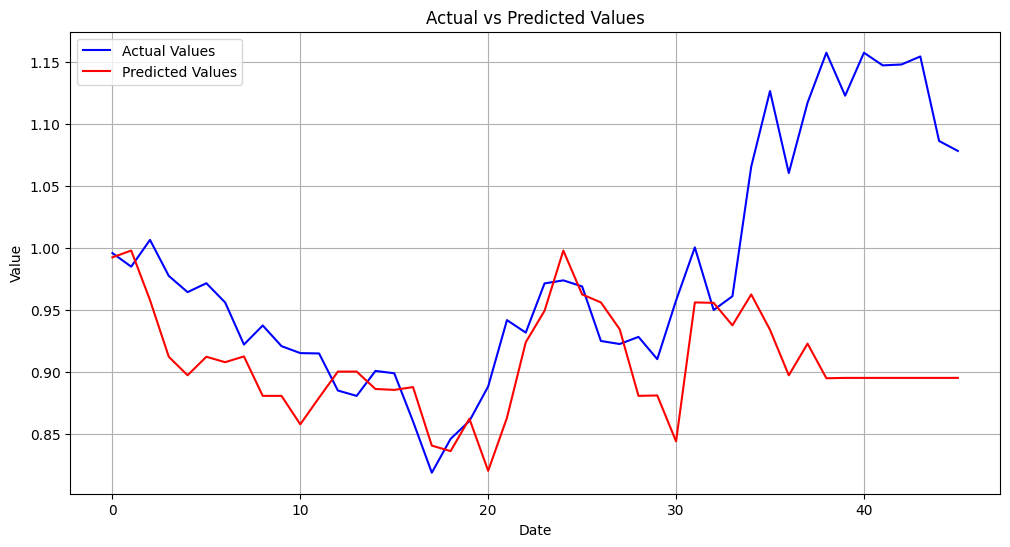

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot( y_pred, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Next 30 Days Forecasting with XGB Regressor

In [ ]:
# Forecast next 30 days using the XGB Regressor model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(30):
    future_pred = Xgb_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

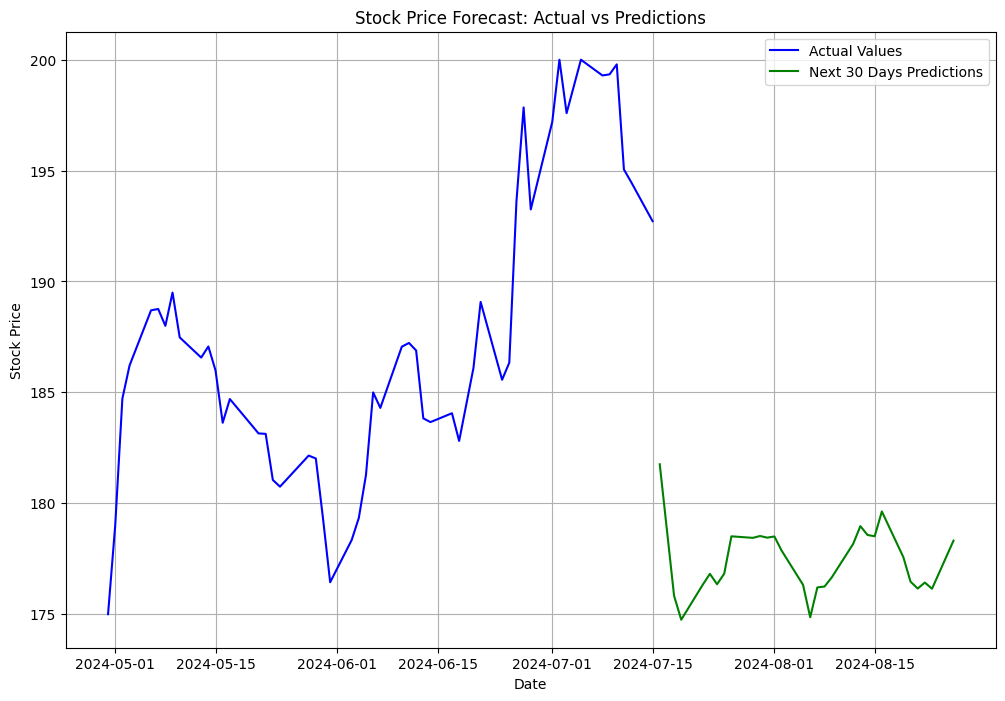

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

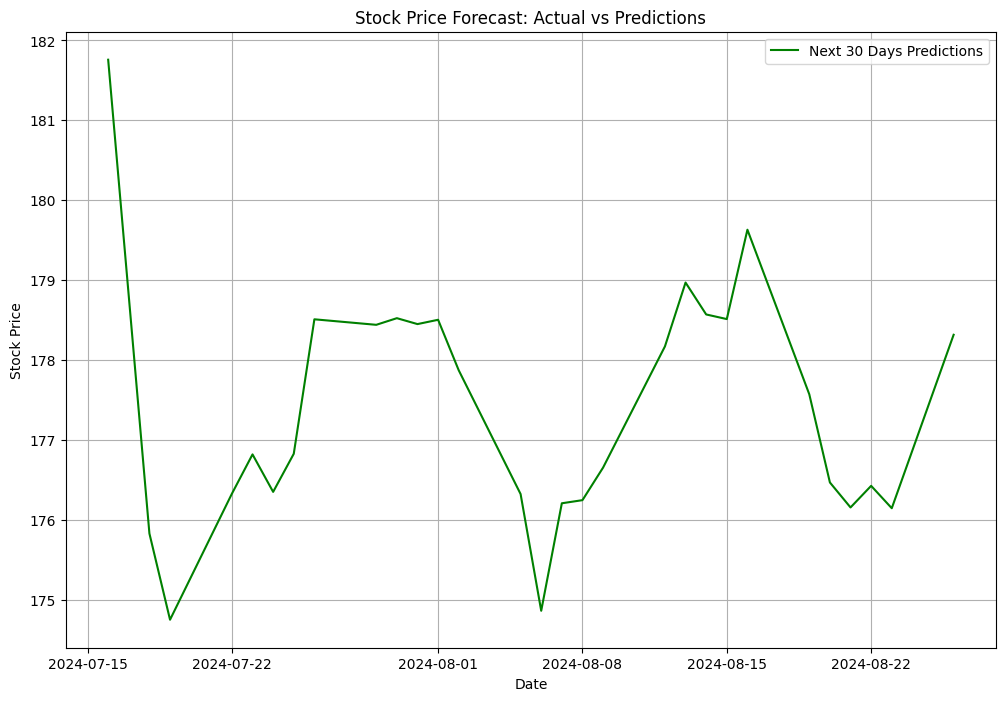

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 30 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

# Next 90 Days Forecasting with XGB Regressor

In [ ]:
# Forecast next 30 days using the Linear Regression model
X_last = scaled_test_data[-time_step:].reshape(1, -1)
future_predictions = []
for _ in range(90):
    future_pred = Xgb_model.predict(X_last)
    future_predictions.append(future_pred)
    X_last = np.append(X_last[:, 1:], future_pred).reshape(1, -1)

In [ ]:
# Inverse transform and plot the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

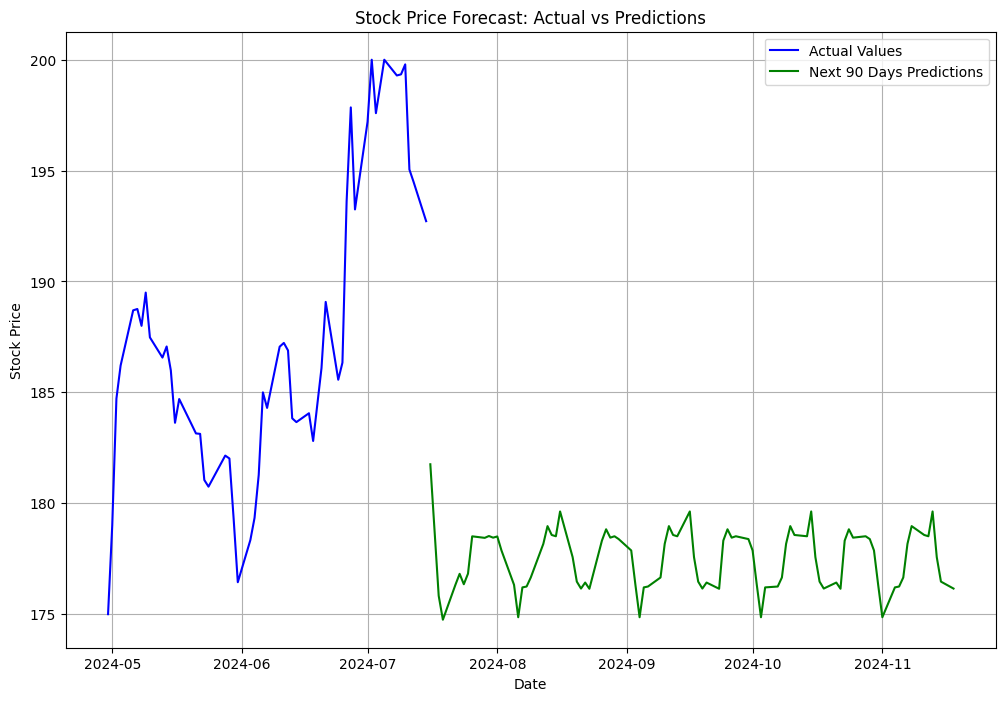

In [ ]:
# Plotting both historical and future data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data['Close'], label='Actual Values', color='blue')
#plt.plot(test_data.index[time_step:], lr_predictions, label='Linear Regression Predictions', color='red')

# Forecast future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()

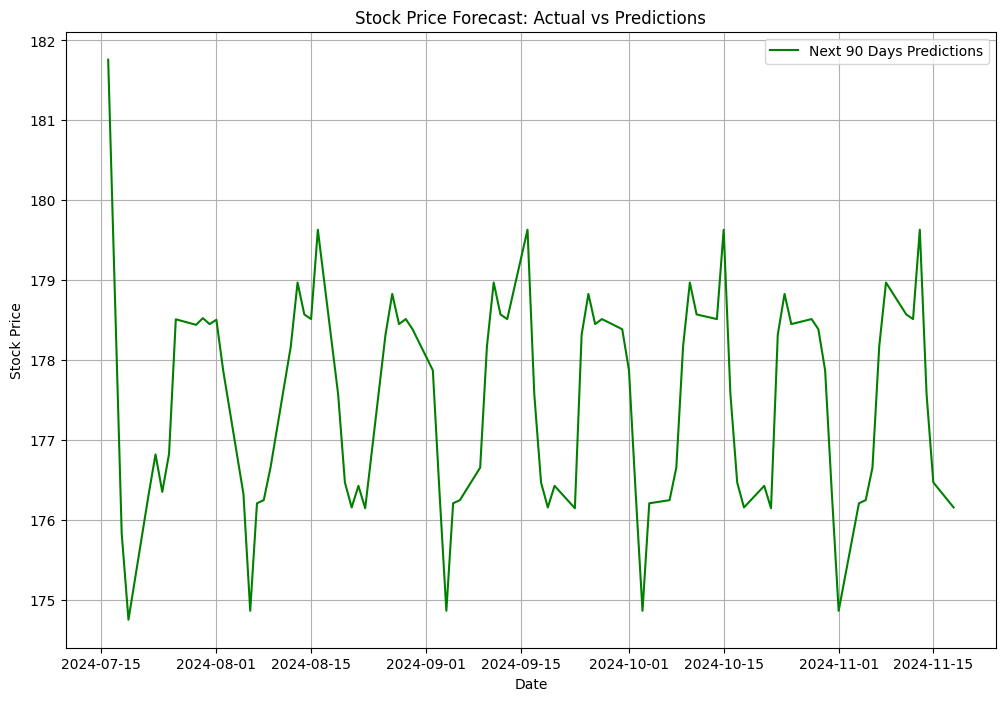

In [ ]:
# Forecast future dates
plt.figure(figsize=(12, 8))
future_dates = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]
plt.plot(future_dates, future_predictions, label='Next 90 Days Predictions', color='green')

plt.title('Stock Price Forecast: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.legend()